In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
data = pd.read_csv("Baseball Stats Final Project.csv")

In [37]:
data

,Team,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,...,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory
0,Angels-2002,3.53,3123,687,322,71,0.242,0.372,3074,769,...,387,400,370,330,5,8,18,59,106.7,21.5
1,Angels-2003,3.77,3182,743,339,84,0.256,0.403,2989,718,...,387,400,370,330,5,8,18,59,106.7,21.5
2,Angels-2004,4.28,3241,772,383,94,0.261,0.417,3076,782,...,387,400,370,330,5,8,18,59,106.7,21.5
3,Angels-2005,3.46,3122,704,311,74,0.244,0.387,2993,729,...,387,400,370,330,5,8,18,59,106.7,21.5
4,Angels-2006,3.76,3124,727,346,72,0.253,0.392,3053,766,...,387,400,370,330,5,8,18,59,106.7,21.5
5,Angels-2007,3.85,3143,740,348,68,0.257,0.397,3102,843,...,387,400,370,330,5,8,18,59,106.7,21.5
6,Angels-2008,4.07,3114,739,354,82,0.257,0.404,3000,752,...,387,400,370,330,5,8,18,59,106.7,21.5
7,Angels-2009,4.44,3184,777,386,104,0.268,0.439,3057,783,...,387,400,370,330,5,8,18,59,106.7,21.5
8,Angels-2010,3.55,3204,692,322,68,0.238,0.369,3008,662,...,387,400,370,330,5,8,18,59,106.7,21.5
9,Astros-2002,3.85,3155,727,347,70,0.251,0.393,3130,778,...,362,436,373,326,21,9,7,49,107.0,21.0


In [38]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(data.describe())

,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,HR,R,RBI,AVG,SLG,Park_Factor,Home_Games,Away_Games,Runs_Scored_Away,Runs_Allowed_Away,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,263.000000,263.000000
mean,4.148148,3181.140741,737.203704,371.292593,83.685185,0.254863,0.409996,3063.992593,729.533333,85.262963,385.707407,367.596296,0.268807,0.429007,1.003279,80.962963,80.959259,371.240741,385.707407,331.529630,371.466667,404.262963,373.900000,328.959259,11.209259,9.112963,11.320370,53.059259,110.009886,24.278707
std,0.596015,73.314028,54.875858,50.758261,16.692077,0.014815,0.031706,64.669132,51.356224,21.428565,51.473814,49.985016,0.015087,0.034154,0.114431,0.308670,0.302111,41.902407,43.640807,9.642545,11.201633,8.481848,8.078679,10.806261,7.500663,3.600033,5.499928,5.487076,3.528896,4.562032
min,2.760000,2998.000000,598.000000,255.000000,42.000000,0.219000,0.333000,2861.000000,567.000000,35.000000,239.000000,229.000000,0.219000,0.322000,0.741337,80.000000,80.000000,254.000000,285.000000,310.000000,335.000000,390.000000,352.000000,302.000000,4.000000,6.000000,4.000000,43.000000,105.000000,18.100000
25%,3.762500,3138.000000,702.250000,339.000000,72.000000,0.244250,0.391000,3022.000000,696.000000,69.000000,351.000000,332.000000,0.259000,0.406000,0.923518,81.000000,81.000000,343.250000,353.000000,328.000000,365.000000,400.000000,370.000000,325.000000,8.000000,8.000000,8.000000,50.000000,107.500000,21.500000
50%,4.110000,3179.000000,733.500000,367.500000,82.000000,0.254500,0.409000,3058.500000,727.000000,83.000000,383.000000,367.500000,0.268000,0.428000,0.994917,81.000000,81.000000,370.000000,381.500000,330.000000,371.000000,401.000000,375.000000,330.000000,8.000000,8.000000,8.000000,53.000000,109.100000,23.600000
75%,4.510000,3227.000000,775.750000,402.500000,93.000000,0.266000,0.430000,3106.000000,764.750000,98.000000,420.500000,399.000000,0.279000,0.451000,1.068707,81.000000,81.000000,399.000000,414.000000,336.000000,380.000000,408.000000,376.000000,335.000000,12.000000,9.000000,14.000000,55.000000,112.100000,25.300000
max,6.270000,3441.000000,906.000000,532.000000,135.000000,0.300000,0.501000,3276.000000,902.000000,153.000000,537.000000,519.000000,0.316000,0.528000,1.435414,82.000000,82.000000,481.000000,504.000000,355.000000,390.000000,436.000000,390.000000,353.000000,37.000000,25.000000,25.000000,73.000000,119.200000,40.700000


In [39]:
data.Hitters_Park.value_counts()

No     139
Yes    131
Name: Hitters_Park, dtype: int64

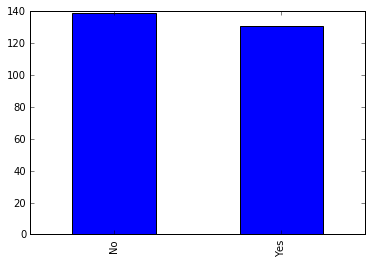

In [40]:
data.Hitters_Park.value_counts().plot(kind='bar')

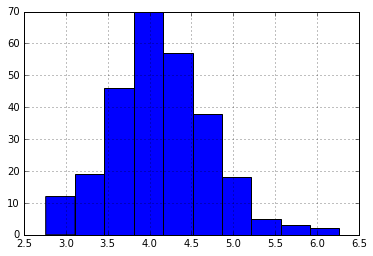

In [41]:
data.ERA.hist()

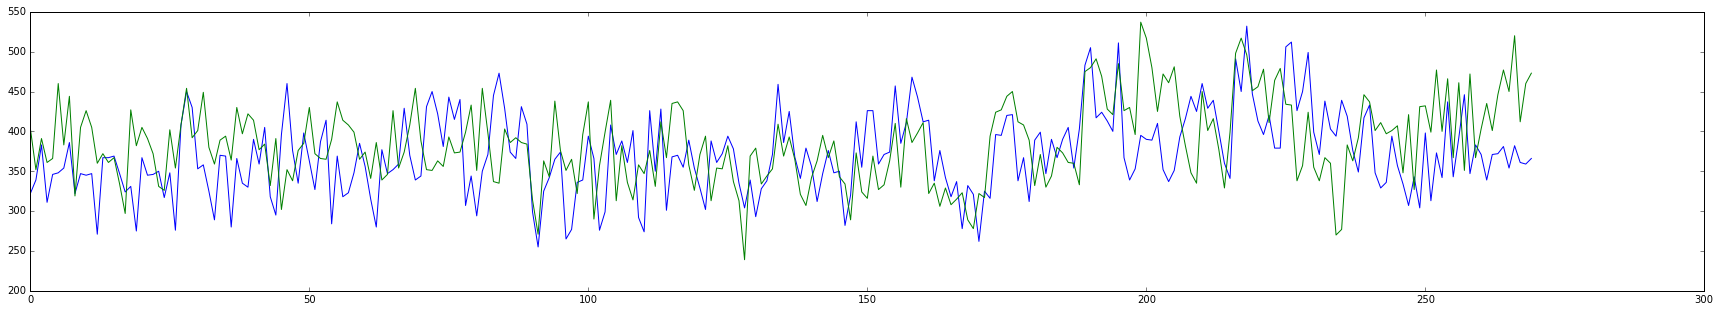

In [42]:
RA_RS = pd.DataFrame({'R-Allowed': data['R-Allowed'], 'R-Scored' : data['R']})
plt.figure(figsize=(30,5))
plt.plot(RA_RS)
plt.show()

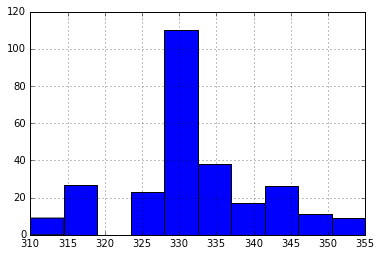

In [43]:
data.Left_Field.hist()

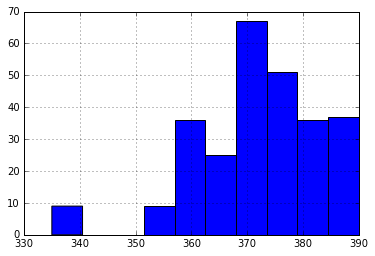

In [44]:
data.Left_Center.hist()

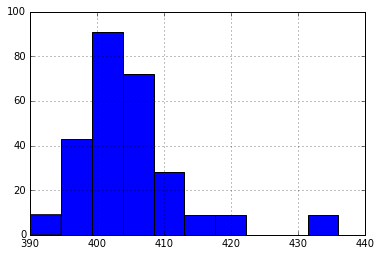

In [45]:
data.Center.hist()

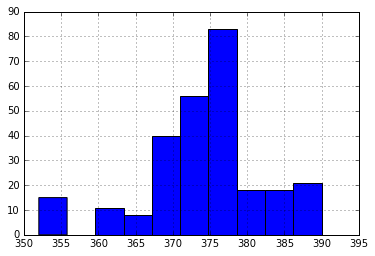

In [46]:
data.Right_Center.hist()

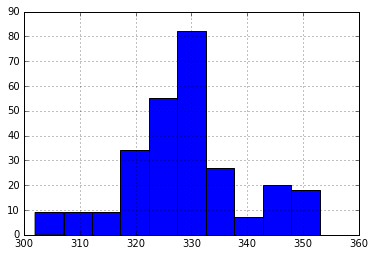

In [47]:
data.Right_Field.hist()

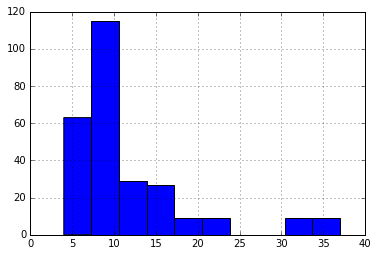

In [48]:
data.Left_Field_Wall.hist()

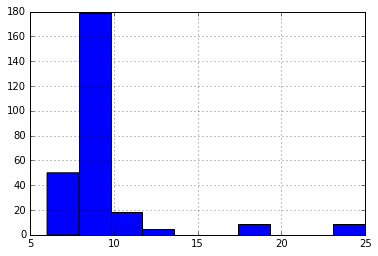

In [49]:
data.Center_Field_Wall.hist()

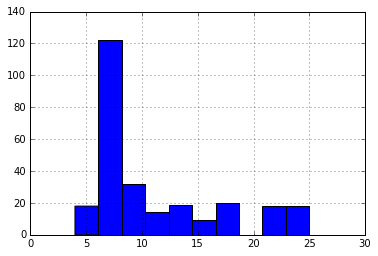

In [50]:
data.Right_Field_Wall.hist()

In [51]:
avgFair = data.Fair_Territory.mean()
avgFair

110.00988593155887

In [52]:
data.Fair_Territory = data.Fair_Territory.fillna(value=avgFair)

In [53]:
avgFoul = data.Foul_Territory.mean()
avgFoul

24.27870722433458

In [54]:
data.Foul_Territory = data.Foul_Territory.fillna(value=avgFoul)

In [55]:
data.drop(['Team'], axis=1, inplace=True)

In [56]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(data)

,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,HR,R,RBI,AVG,SLG,Park_Factor,Hitters_Park,Home_Games,Away_Games,Runs_Scored_Away,Runs_Allowed_Away,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory
0,3.53,3123,687,322,71,0.242,0.372,3074,769,71,404,393,0.279,0.427,0.939198,No,81,81,447,326,330,387,400,370,330,5,8,18,59,106.700000,21.500000
1,3.77,3182,743,339,84,0.256,0.403,2989,718,68,352,332,0.267,0.406,0.852271,No,82,80,384,407,330,387,400,370,330,5,8,18,59,106.700000,21.500000
2,4.28,3241,772,383,94,0.261,0.417,3076,782,77,391,370,0.282,0.418,0.972362,No,81,81,445,351,330,387,400,370,330,5,8,18,59,106.700000,21.500000
3,3.46,3122,704,311,74,0.244,0.387,2993,729,71,361,347,0.268,0.406,0.918033,No,81,81,400,332,330,387,400,370,330,5,8,18,59,106.700000,21.500000
4,3.76,3124,727,346,72,0.253,0.392,3053,766,69,366,348,0.279,0.418,0.905852,No,81,81,400,386,330,387,400,370,330,5,8,18,59,106.700000,21.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3.97,3113,710,354,85,0.250,0.400,3097,770,111,450,436,0.284,0.470,0.900336,No,81,81,480,413,318,385,408,375,314,8,7,10,73,110.009886,24.278707
266,4.32,3178,749,382,81,0.260,0.412,3242,845,107,520,499,0.300,0.474,1.069988,Yes,81,81,448,395,318,385,408,375,314,8,7,10,73,110.009886,24.278707
267,4.11,3120,707,361,68,0.249,0.387,3087,773,92,412,393,0.281,0.440,1.040377,Yes,81,81,377,366,318,385,408,375,314,8,7,10,73,110.009886,24.278707
268,4.03,3208,706,359,101,0.245,0.404,3177,785,136,460,444,0.284,0.490,0.964664,No,81,81,455,394,318,382,408,360,314,8,8,8,52,108.800000,19.700000


In [57]:
data.drop(['Park_Factor'], axis=1, inplace=True)
data.drop(['Home_Games'], axis=1, inplace=True)
data.drop(['Away_Games'], axis=1, inplace=True)
data.drop(['Runs_Scored_Away'], axis=1, inplace=True)
data.drop(['Runs_Allowed_Away'], axis=1, inplace=True)
data.drop(['R-Allowed'], axis=1, inplace=True)
data.drop(['R'], axis = 1, inplace=True)

In [33]:
data.drop(['High_Temp'], axis=1, inplace=True)
data.drop(['Avg_Temp'], axis=1, inplace=True)
data.drop(['Low_Temp'], axis=1, inplace=True)
data.drop(['Max_Humidity'], axis=1, inplace=True)
data.drop(['Avg_Humidity'], axis=1, inplace=True)
data.drop(['Low_Humidity'], axis=1, inplace=True)
data.drop(['High_Wind'], axis=1, inplace=True)
data.drop(['Avg_Wind'], axis=1, inplace=True)
data.drop(['Elevation'], axis=1, inplace=True)

In [58]:
dummies = pd.get_dummies(data['Hitters_Park'], prefix='Hitters_Park')
y = dummies['Hitters_Park_Yes']

In [59]:
data.drop(['Hitters_Park'], axis=1, inplace=True)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

In [61]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [3,5,7]

rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc, dict(n_estimators=n_estimators, max_features=max_features, min_samples_split=min_samples_split)
                        ,cv=None, n_jobs=-1)

In [62]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [63]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
best_rfc = estimator.best_estimator_

In [65]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.703703703704


In [66]:
y_hat = best_rfc.predict(X_test)

In [67]:
y_hat

array([ 0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.])

In [68]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

        0.0       0.74      0.63      0.68        27
        1.0       0.68      0.78      0.72        27

avg / total       0.71      0.70      0.70        54



In [69]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[17 10]
 [ 6 21]]


In [70]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.77366255144


In [71]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [72]:
scores

array([ 0.67857143,  0.62962963,  0.74074074,  0.74074074,  0.74074074,
        0.7037037 ,  0.92592593,  0.88888889,  0.48148148,  0.53846154])

In [73]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci = 2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/- %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)
    

Score is 0.706888 +/- 0.093401
95 percent probability that if this experiment were repeated over and over the average score would be between 0.613488 and 0.800289


In [74]:
dataTest = pd.read_csv("Baseball Stats Final Project Test.csv")
dataTest

,Team,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,...,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory
0,Angels,2.82,3085,618,251,39,0.221,0.327,2961,664,...,387,400,370,330,5,8,18,59,106.7,21.5
1,Angels,3.44,3003,638,309,79,0.230,0.367,2914,720,...,387,400,370,330,5,8,18,59,106.7,21.5
2,Angels,4.13,3227,745,371,80,0.254,0.397,3068,741,...,387,400,370,330,5,8,18,59,106.7,21.5
3,Angels,3.39,3164,672,310,55,0.231,0.341,3087,701,...,387,400,370,330,5,8,18,59,106.7,21.5
4,Angels,4.68,3006,713,377,96,0.259,0.434,2926,659,...,387,400,370,330,5,8,18,59,106.7,21.5
5,Astros,2.83,3074,642,253,56,0.225,0.338,3059,727,...,362,436,373,326,21,9,7,49,107.0,21.0
6,Astros,3.81,3180,726,355,79,0.250,0.396,2988,636,...,362,436,373,326,21,9,7,49,107.0,21.0
7,Astros,4.99,3334,801,457,106,0.270,0.449,2983,627,...,362,436,373,326,21,9,7,49,107.0,21.0
8,Astros,4.04,3136,726,362,73,0.253,0.398,2978,655,...,362,436,373,326,21,9,7,49,107.0,21.0
9,Astros,3.95,2958,662,337,78,0.245,0.393,2917,658,...,362,436,373,326,21,9,7,49,107.0,21.0


In [75]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(dataTest)

,Team,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,HR,R,RBI,AVG,SLG,Park_Factor,Hitters_Park,Home_Games,Away_Games,Runs_Scored_Away,Runs_Allowed_Away,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory
0,Angels,2.82,3085,618,251,39,0.221,0.327,2961,664,62,305,284,0.248,0.377,0.785311,No,81,81,362,346,330,387,400,370,330,5,8,18,59,106.7,21.5
1,Angels,3.44,3003,638,309,79,0.230,0.367,2914,720,82,348,336,0.272,0.428,0.812114,No,81,81,419,390,330,387,400,370,330,5,8,18,59,106.7,21.5
2,Angels,4.13,3227,745,371,80,0.254,0.397,3068,741,77,352,335,0.271,0.415,0.967871,No,81,81,381,366,330,387,400,370,330,5,8,18,59,106.7,21.5
3,Angels,3.39,3164,672,310,55,0.231,0.341,3087,701,73,362,341,0.252,0.388,0.919289,No,81,81,411,320,330,387,400,370,330,5,8,18,59,106.7,21.5
4,Angels,4.68,3006,713,377,96,0.259,0.434,2926,659,94,320,301,0.250,0.409,0.970752,No,81,81,341,377,330,387,400,370,330,5,8,18,59,106.7,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Yankees,4.73,3269,797,422,108,0.268,0.452,3126,744,122,471,459,0.274,0.467,1.248951,Yes,81,81,396,319,318,382,408,360,314,8,8,8,52,108.8,19.7
146,Yankees,3.67,3063,668,327,94,0.237,0.400,3004,709,138,406,394,0.266,0.469,1.195759,Yes,81,81,272,341,318,382,408,360,314,8,8,8,52,108.8,19.7
147,Yankees,4.10,3121,759,351,92,0.263,0.424,2944,659,75,337,324,0.252,0.387,1.086888,Yes,81,81,313,320,318,382,408,360,314,8,8,8,52,108.8,19.7
148,Yankees,3.66,3115,712,326,97,0.247,0.402,2965,662,88,304,286,0.247,0.396,0.944528,No,81,81,329,338,318,382,408,360,314,8,8,8,52,108.8,19.7


In [76]:
y_Team = dataTest['Team']
dataTest.drop(['Team'], axis=1, inplace=True)
dataTest.drop(['Park_Factor'], axis=1, inplace=True)
dataTest.drop(['Home_Games'], axis=1, inplace=True)
dataTest.drop(['Away_Games'], axis=1, inplace=True)
dataTest.drop(['Runs_Scored_Away'], axis=1, inplace=True)
dataTest.drop(['R-Allowed'], axis=1, inplace=True)
dataTest.drop(['R'], axis=1, inplace=True)

In [77]:
dummies = pd.get_dummies(dataTest['Hitters_Park'], prefix='Hitters_Park')
dummies

,Hitters_Park_No,Hitters_Park_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,0,1


In [78]:
yTest = dummies.pop('Hitters_Park_Yes')

In [79]:
dataTest.drop(['Hitters_Park'], axis=1, inplace=True)

In [80]:
estimator.fit(dataTest, yTest)
estimator.best_estimator_
best_rfc = estimator.best_estimator_

In [81]:
accuracy = accuracy_score(yTest, best_rfc.predict(dataTest))
print "Accuracy: ", accuracy

Accuracy:  1.0


In [82]:
from pandas import DataFrame
df = DataFrame({'Team': y_Team, 'Hitters_Park': yTest, 'Prediction': best_rfc.predict(dataTest)})

In [83]:
columns = ['Team', 'Formula', 'Prediction']
graph = pd.DataFrame(columns = columns)

In [84]:
graph.loc[0] = ['Angels', sum(df[df.Team == 'Angels'].Hitters_Park)/5*100, sum(df[df.Team == 'Angels'].Prediction)/5*100]


In [85]:
graph

,Team,Formula,Prediction
0,Angels,0,0


In [86]:
df[df.Team == 'Angels']

,Hitters_Park,Prediction,Team
0,0,0,Angels
1,0,0,Angels
2,0,0,Angels
3,0,0,Angels
4,0,0,Angels


In [87]:
graph.loc[1] = ['Astros', sum(df[df.Team == 'Astros'].Hitters_Park)/5, sum(df[df.Team == 'Astros'].Prediction)/5]

In [88]:
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6


In [89]:
df[df.Team == 'Astros']

,Hitters_Park,Prediction,Team
5,0,0,Astros
6,0,0,Astros
7,1,1,Astros
8,1,1,Astros
9,1,1,Astros


In [90]:
graph.loc[2] = ['Athletics', sum(df[df.Team == 'Athletics'].Hitters_Park)/5, sum(df[df.Team == 'Athletics'].Prediction)/5]

In [91]:
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4


In [92]:
df[df.Team == 'Athletics']

,Hitters_Park,Prediction,Team
10,0,0,Athletics
11,0,0,Athletics
12,0,0,Athletics
13,1,1,Athletics
14,1,1,Athletics


In [93]:
graph.loc[3] = ['Blue Jays', sum(df[df.Team == 'Blue Jays'].Hitters_Park)/5, sum(df[df.Team == 'Blue Jays'].Prediction)/5]

In [94]:
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6


In [95]:
df[df.Team == 'Blue Jays']

,Hitters_Park,Prediction,Team
15,0,0,Blue Jays
16,0,0,Blue Jays
17,1,1,Blue Jays
18,1,1,Blue Jays
19,1,1,Blue Jays


In [96]:
graph.loc[4] = ['Braves', sum(df[df.Team == 'Braves'].Hitters_Park)/5, sum(df[df.Team == 'Braves'].Prediction)/5]

In [97]:
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2


In [98]:
df[df.Team == 'Braves']

,Hitters_Park,Prediction,Team
20,0,0,Braves
21,1,1,Braves
22,0,0,Braves
23,0,0,Braves
24,0,0,Braves


In [99]:
graph.loc[5] = ['Brewers', sum(df[df.Team == 'Brewers'].Hitters_Park)/5, sum(df[df.Team == 'Brewers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0


In [100]:
df[df.Team == 'Brewers']

,Hitters_Park,Prediction,Team
25,1,1,Brewers
26,1,1,Brewers
27,1,1,Brewers
28,1,1,Brewers
29,1,1,Brewers


In [101]:
graph.loc[6] = ['Cardinals', sum(df[df.Team == 'Cardinals'].Hitters_Park)/5, sum(df[df.Team == 'Brewers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0


In [102]:
df[df.Team == 'Cardinals']

,Hitters_Park,Prediction,Team
30,0,0,Cardinals
31,0,0,Cardinals
32,0,0,Cardinals
33,1,1,Cardinals
34,0,0,Cardinals


In [103]:
graph.loc[7] = ['Cubs', sum(df[df.Team == 'Cubs'].Hitters_Park)/5, sum(df[df.Team == 'Cubs'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2


In [104]:
df[df.Team == 'Cubs']

,Hitters_Park,Prediction,Team
35,0,0,Cubs
36,0,0,Cubs
37,1,1,Cubs
38,0,0,Cubs
39,0,0,Cubs


In [105]:
graph.loc[8] = ['Diamondbacks', sum(df[df.Team == 'Diamondbacks'].Hitters_Park)/5, sum(df[df.Team == 'Diamondbacks'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8


In [106]:
df[df.Team == 'Diamondbacks']

,Hitters_Park,Prediction,Team
40,1,1,Diamondbacks
41,1,1,Diamondbacks
42,0,0,Diamondbacks
43,1,1,Diamondbacks
44,1,1,Diamondbacks


In [107]:
graph.loc[9] = ['Dodgers', sum(df[df.Team == 'Dodgers'].Hitters_Park)/5, sum(df[df.Team == 'Dodgers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [108]:
df[df.Team == 'Dodgers']

,Hitters_Park,Prediction,Team
45,0,0,Dodgers
46,0,0,Dodgers
47,0,0,Dodgers
48,0,0,Dodgers
49,1,1,Dodgers


In [109]:
graph.loc[10] = ['Giants', sum(df[df.Team == 'Giants'].Hitters_Park)/5, sum(df[df.Team == 'Giants'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [110]:
df[df.Team == 'Giants']

,Hitters_Park,Prediction,Team
50,0,0,Giants
51,0,0,Giants
52,0,0,Giants
53,0,0,Giants
54,0,0,Giants


In [111]:
graph.loc[11] = ['Indians', sum(df[df.Team == 'Indians'].Hitters_Park)/5, sum(df[df.Team == 'Indians'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [112]:
df[df.Team == 'Indians']

,Hitters_Park,Prediction,Team
55,0,0,Indians
56,0,0,Indians
57,0,0,Indians
58,0,0,Indians
59,1,1,Indians


In [113]:
graph.loc[12] = ['Mariners', sum(df[df.Team == 'Mariners'].Hitters_Park)/5, sum(df[df.Team == 'Mariners'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [114]:
df[df.Team == 'Mariners']

,Hitters_Park,Prediction,Team
60,0,0,Mariners
61,0,0,Mariners
62,0,0,Mariners
63,0,0,Mariners
64,0,0,Mariners


In [115]:
graph.loc[13] = ['Marlins', sum(df[df.Team == 'Marlins'].Hitters_Park)/5, sum(df[df.Team == 'Marlins'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [116]:
df[df.Team == 'Marlins']

,Hitters_Park,Prediction,Team
65,1,1,Marlins
66,0,0,Marlins
67,1,1,Marlins
68,1,1,Marlins
69,0,0,Marlins


In [117]:
graph.loc[14] = ['Mets', sum(df[df.Team == 'Mets'].Hitters_Park)/5, sum(df[df.Team == 'Mets'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [118]:
df[df.Team == 'Mets']

,Hitters_Park,Prediction,Team
70,0,0,Mets
71,0,0,Mets
72,0,0,Mets
73,0,0,Mets
74,0,0,Mets


In [119]:
graph.loc[15] = ['Nationals', sum(df[df.Team == 'Nationals'].Hitters_Park)/5, sum(df[df.Team == 'Nationals'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [120]:
df[df.Team == 'Nationals']

,Hitters_Park,Prediction,Team
75,1,1,Nationals
76,1,1,Nationals
77,1,1,Nationals
78,1,1,Nationals
79,1,1,Nationals


In [121]:
graph.loc[16] = ['Orioles', sum(df[df.Team == 'Orioles'].Hitters_Park)/5, sum(df[df.Team == 'Orioles'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [122]:
df[df.Team == 'Orioles']

,Hitters_Park,Prediction,Team
80,0,0,Orioles
81,1,1,Orioles
82,1,1,Orioles
83,0,0,Orioles
84,1,1,Orioles


In [123]:
graph.loc[17] = ['Padres', sum(df[df.Team == 'Orioles'].Hitters_Park)/5, sum(df[df.Team == 'Orioles'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [124]:
df[df.Team == 'Padres']

,Hitters_Park,Prediction,Team
85,0,0,Padres
86,0,0,Padres
87,0,0,Padres
88,0,0,Padres
89,0,0,Padres


In [125]:
graph.loc[18] = ['Phillies', sum(df[df.Team == 'Phillies'].Hitters_Park)/5, sum(df[df.Team == 'Phillies'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [126]:
df[df.Team == 'Phillies']

,Hitters_Park,Prediction,Team
90,1,1,Phillies
91,0,0,Phillies
92,1,1,Phillies
93,0,0,Phillies
94,1,1,Phillies


In [127]:
graph.loc[19] = ['Pirates', sum(df[df.Team == 'Pirates'].Hitters_Park)/5, sum(df[df.Team == 'Pirates'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [128]:
df[df.Team == 'Pirates']

,Hitters_Park,Prediction,Team
95,0,0,Pirates
96,0,0,Pirates
97,0,0,Pirates
98,0,0,Pirates
99,0,0,Pirates


In [129]:
graph.loc[20] = ['Rangers', sum(df[df.Team == 'Rangers'].Hitters_Park)/5, sum(df[df.Team == 'Rangers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [130]:
df[df.Team == 'Rangers']

,Hitters_Park,Prediction,Team
100,1,1,Rangers
101,1,1,Rangers
102,0,0,Rangers
103,1,1,Rangers
104,1,1,Rangers


In [131]:
graph.loc[21] = ['Rays', sum(df[df.Team == 'Rays'].Hitters_Park)/5, sum(df[df.Team == 'Rays'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [132]:
df[df.Team == 'Rays']

,Hitters_Park,Prediction,Team
105,0,0,Rays
106,0,0,Rays
107,0,0,Rays
108,1,1,Rays
109,0,0,Rays


In [133]:
graph.loc[22] = ['Red Sox', sum(df[df.Team == 'Red Sox'].Hitters_Park)/5, sum(df[df.Team == 'Red Sox'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [134]:
df[df.Team == 'Red Sox']

,Hitters_Park,Prediction,Team
110,1,1,Red Sox
111,1,1,Red Sox
112,0,0,Red Sox
113,1,1,Red Sox
114,1,1,Red Sox


In [135]:
graph.loc[23] = ['Reds', sum(df[df.Team == 'Reds'].Hitters_Park)/5, sum(df[df.Team == 'Reds'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [136]:
df[df.Team == 'Reds']

,Hitters_Park,Prediction,Team
115,1,1,Reds
116,1,1,Reds
117,1,1,Reds
118,0,0,Reds
119,1,1,Reds


In [137]:
graph.loc[24] = ['Rockies', sum(df[df.Team == 'Rockies'].Hitters_Park)/5, sum(df[df.Team == 'Rockies'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [138]:
df[df.Team == 'Rockies']

,Hitters_Park,Prediction,Team
120,1,1,Rockies
121,1,1,Rockies
122,1,1,Rockies
123,1,1,Rockies
124,1,1,Rockies


In [139]:
graph.loc[25] = ['Royals', sum(df[df.Team == 'Royals'].Hitters_Park)/5, sum(df[df.Team == 'Royals'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [140]:
df[df.Team == 'Royals']

,Hitters_Park,Prediction,Team
125,1,1,Royals
126,1,1,Royals
127,1,1,Royals
128,1,1,Royals
129,1,1,Royals


In [141]:
graph.loc[26] = ['Tigers', sum(df[df.Team == 'Tigers'].Hitters_Park)/5, sum(df[df.Team == 'Tigers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [142]:
df[df.Team == 'Tigers']

,Hitters_Park,Prediction,Team
130,1,1,Tigers
131,1,1,Tigers
132,1,1,Tigers
133,1,1,Tigers
134,0,0,Tigers


In [143]:
graph.loc[27] = ['Twins', sum(df[df.Team == 'Twins'].Hitters_Park)/5, sum(df[df.Team == 'Twins'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [144]:
df[df.Team == 'Twins']

,Hitters_Park,Prediction,Team
135,0,0,Twins
136,1,1,Twins
137,1,1,Twins
138,1,1,Twins
139,1,1,Twins


In [145]:
graph.loc[28] = ['White Sox', sum(df[df.Team == 'White Sox'].Hitters_Park)/5, sum(df[df.Team == 'White Sox'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [146]:
df[df.Team == 'White Sox']

,Hitters_Park,Prediction,Team
140,1,1,White Sox
141,1,1,White Sox
142,0,0,White Sox
143,1,1,White Sox
144,0,0,White Sox


In [147]:
graph.loc[29] = ['Yankees', sum(df[df.Team == 'Yankees'].Hitters_Park)/5, sum(df[df.Team == 'Yankees'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.0
1,Astros,0.6,0.6
2,Athletics,0.4,0.4
3,Blue Jays,0.6,0.6
4,Braves,0.2,0.2
5,Brewers,1.0,1.0
6,Cardinals,0.2,1.0
7,Cubs,0.2,0.2
8,Diamondbacks,0.8,0.8
9,Dodgers,0.2,0.2


In [148]:
df[df.Team == 'Yankees']

,Hitters_Park,Prediction,Team
145,1,1,Yankees
146,1,1,Yankees
147,1,1,Yankees
148,0,0,Yankees
149,0,0,Yankees


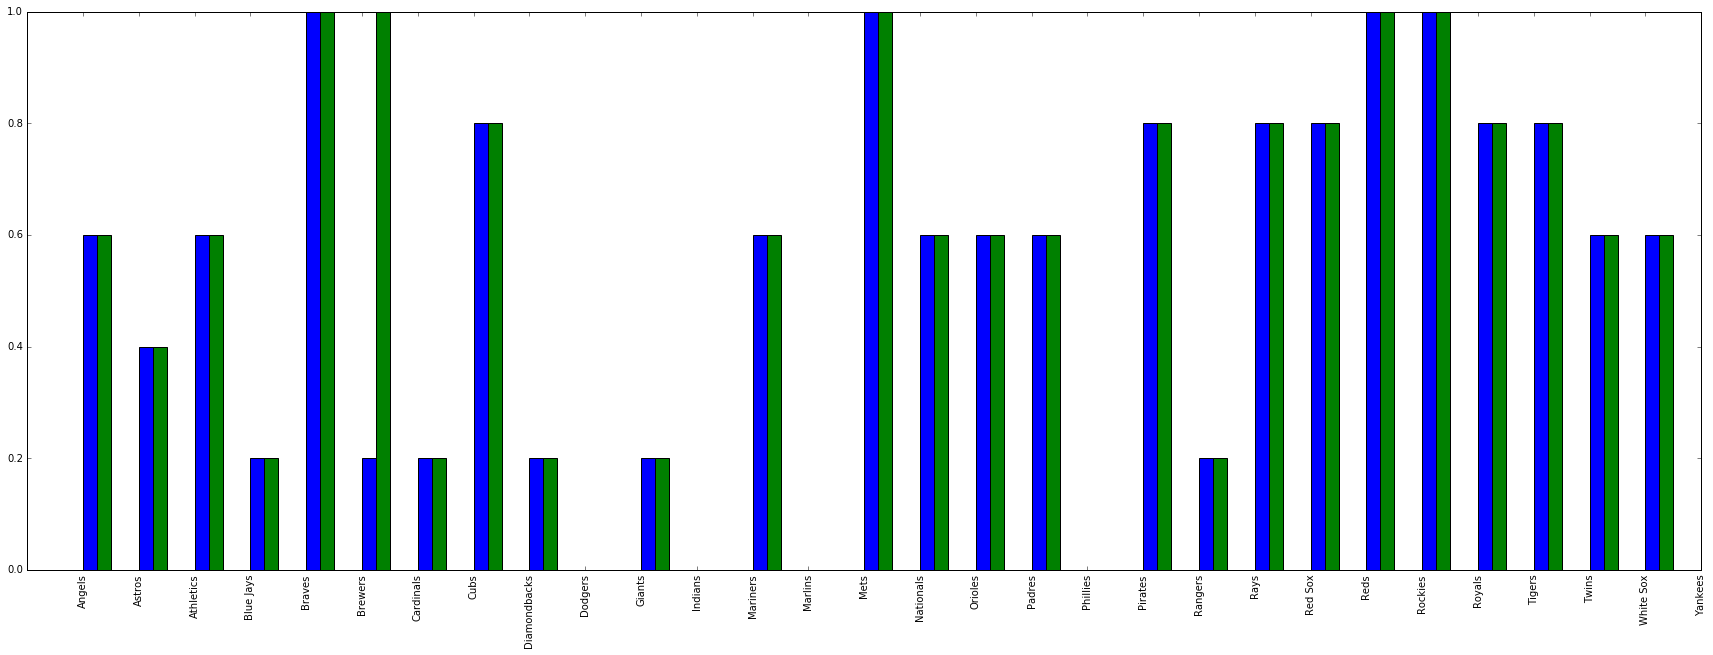

In [175]:
X = np.arange(30)
plt.figure(figsize(30,10))
plt.bar(X + 0.00, graph['Formula'], color = 'b', width = 0.25)
plt.bar(X + 0.25, graph['Prediction'], color = 'g', width = 0.25)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],graph['Team'])
plt.xticks(rotation=90)
plt.show()